<a href="https://colab.research.google.com/github/lvlanson/data_mining/blob/main/Praktikum_3_Aufgabe_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Aufgabe a)

import pandas as pd

csv_url = "https://raw.githubusercontent.com/lvlanson/data_mining/main/Praktikum_3/data_mutal.csv"
df      = pd.read_csv(csv_url)
df.head()

,Gewicht_lbs,Brustumfang,Hueftumfang,Oberarmumfang,Unterarmumfang
0,154.25,93.1,94.5,32.0,27.4
1,173.25,93.6,98.7,30.5,28.9
2,154.00,95.8,99.2,28.8,25.2
3,184.75,101.8,101.2,32.4,29.4
4,184.25,97.3,101.9,32.2,27.7


In [2]:
# Aufgabe b) HelperFunktion für plotten
from plotly.subplots import make_subplots
from math import ceil, floor
import plotly.graph_objects as go

def plot_comparison(df_scale, df_orig, scaler="Normalisiert"):
  fig = make_subplots(rows=1, cols=2, subplot_titles=(scaler, "Original"))
    
  columns = len(df_scale.columns)
  for i in range(columns):
    if i == 0:
      continue
    fig.add_trace(
      go.Scatter(
          x=df_scale.iloc[:, i], 
          y=df_scale.iloc[:, 0],
          mode="markers",
          name=df_scale.columns[i]
      ),
  )

  
  for i in range(columns):
    if i == 0:
      continue
    fig.add_trace(
      go.Scatter(
          x=df_orig.iloc[:, i], 
          y=df_orig.iloc[:, 0],
          mode="markers",
          name=df_scale.columns[i]
      ),
      col=2,
      row=1
  )
  fig.show()


In [3]:
### Aufgabe b) Min Max Scaler
#
# Verwendete Formel: x = (x-min(X) / max(X)-min(X))(new_max(X) - new_min(A)) + new_min(A)
#
# Lineare Transformation der Daten
#
### Verwendung 
#
# MinMaxScaler(feature_range=(min, max))
#
# .fit() berechnet min(X) und max(X)
# .fit_transform() führt Normalisierung durch und gibt normalisierte Daten
#                  als Numpy Array zurück

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(df)

df_min_max = scaler.transform(df)

df_min_max = pd.DataFrame(df_min_max, columns=df.columns)
print(df_min_max.head(), end="\n\n")
print(df_min_max.describe())

plot_comparison(df_min_max, df, "MinMaxScaler")

   Gewicht_lbs  Brustumfang  Hueftumfang  Oberarmumfang  Unterarmumfang
0     0.146127     0.242531     0.151515       0.356436        0.460432
1     0.223789     0.251318     0.218501       0.282178        0.568345
2     0.145105     0.289982     0.226475       0.198020        0.302158
3     0.270795     0.395431     0.258373       0.376238        0.604317
4     0.268751     0.316344     0.269537       0.366337        0.482014

       Gewicht_lbs  Brustumfang  Hueftumfang  Oberarmumfang  Unterarmumfang
count   252.000000   252.000000   252.000000     252.000000      252.000000
mean      0.246983     0.378281     0.237716       0.369971        0.551359
std       0.120127     0.148163     0.114259       0.149568        0.145373
min       0.000000     0.000000     0.000000       0.000000        0.000000
25%       0.165543     0.264499     0.167464       0.267327        0.453237
50%       0.237073     0.357645     0.228070       0.358911        0.553957
75%       0.320867     0.458260    

In [4]:
### Aufgabe b) Z-Score Normalisierung
#
# Verwendete Formel x = (x - x_mean) / x_std

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df)

df_z = scaler.fit_transform(df)

df_z = pd.DataFrame(df_z, columns=df.columns)

print(df_z.head(), end="\n\n")
print(df_z.describe())

plot_comparison(df_z, df, "Z-Score/StandardScaler")

   Gewicht_lbs  Brustumfang  Hueftumfang  Oberarmumfang  Unterarmumfang
0    -0.841246    -0.918048    -0.755929      -0.090676       -0.626718
1    -0.193462    -0.858621    -0.168502      -0.588143        0.117079
2    -0.849769    -0.597144    -0.098570      -1.151940       -1.717621
3     0.198617     0.115976     0.181157       0.041982        0.365012
4     0.181570    -0.418864     0.279061      -0.024347       -0.477959

        Gewicht_lbs   Brustumfang   Hueftumfang  Oberarmumfang  Unterarmumfang
count  2.520000e+02  2.520000e+02  2.520000e+02   2.520000e+02    2.520000e+02
mean   2.757935e-16 -3.524518e-17  8.132824e-16  -8.304644e-17   -2.977336e-15
std    1.001990e+00  1.001990e+00  1.001990e+00   1.001990e+00    1.001990e+00
min   -2.060102e+00 -2.558224e+00 -2.084632e+00  -2.478519e+00   -3.800254e+00
25%   -6.793000e-01 -7.694810e-01 -6.160653e-01  -6.876368e-01   -6.763048e-01
50%   -8.265733e-02 -1.395583e-01 -8.458411e-02  -7.409368e-02    1.790624e-02
75%    6.16266

In [5]:
### Aufgabe b) RobustScaler Normalisierung
#
# Beachtet Ausreißer beim Skalieren. Wenn sich viele Ausreißer im Datensatz
# befinden, können negative Auswirkungen auf den Skalierungsprozess folgen:
# Mehr dazu hier: 
# https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html
#

from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
scaler.fit(df)

df_rs = scaler.transform(df)
df_rs = pd.DataFrame(df_rs, columns=df.columns)

print(df_rs.head(), end="\n\n")
print(df_rs.describe())

plot_comparison(df_rs, df, "RobustScaler")

   Gewicht_lbs  Brustumfang  Hueftumfang  Oberarmumfang  Unterarmumfang
0    -0.585526    -0.594104    -0.598131      -0.012121       -0.481481
1    -0.085526    -0.548753    -0.074766      -0.375758        0.074074
2    -0.592105    -0.349206    -0.012461      -0.787879       -1.296296
3     0.217105     0.195011     0.236760       0.084848        0.259259
4     0.203947    -0.213152     0.323988       0.036364       -0.370370

       Gewicht_lbs   Brustumfang  Hueftumfang  Oberarmumfang  Unterarmumfang
count   252.000000  2.520000e+02   252.000000   2.520000e+02      252.000000
mean      0.063800  1.065040e-01     0.075360   5.416065e-02       -0.013374
std       0.773399  7.646690e-01     0.892717   7.324300e-01        0.748404
min      -1.526316 -1.845805e+00    -1.781931  -1.757576e+00       -2.851852
25%      -0.460526 -4.807256e-01    -0.473520  -4.484848e-01       -0.518519
50%       0.000000 -6.444498e-16     0.000000   8.612902e-16        0.000000
75%       0.539474  5.192744

In [6]:
### Aufgabe b) QuantileTransformer Normalisierung
#
# Beachtet Ausreißer beim Skalieren. Wenn sich viele Ausreißer im Datensatz
# befinden, können negative Auswirkungen auf den Skalierungsprozess folgen:
# Mehr dazu hier: 
# https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html
#

from sklearn.preprocessing import QuantileTransformer

scaler = QuantileTransformer()
scaler.fit(df)

df_qt = scaler.transform(df)
df_qt = pd.DataFrame(df_qt, columns=df.columns)

print(df_qt.head(), end="\n\n")
print(df_qt.describe())

plot_comparison(df_qt, df, "QuantileTransformer")

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2357: UserWarning:

n_quantiles (1000) is greater than the total number of samples (252). n_quantiles is set to n_samples.



   Gewicht_lbs  Brustumfang  Hueftumfang  Oberarmumfang  Unterarmumfang
0     0.183267     0.189243     0.205179       0.494024        0.274900
1     0.468127     0.221116     0.458167       0.286853        0.527888
2     0.179283     0.280876     0.486056       0.109562        0.027888
3     0.629482     0.585657     0.637450       0.535857        0.619522
4     0.621514     0.344622     0.679283       0.521912        0.322709

       Gewicht_lbs  Brustumfang  Hueftumfang  Oberarmumfang  Unterarmumfang
count   252.000000   252.000000   252.000000     252.000000      252.000000
mean      0.500016     0.500016     0.500047       0.500126        0.500253
std       0.290393     0.290410     0.290414       0.290405        0.290411
min       0.000000     0.000000     0.000000       0.000000        0.000000
25%       0.251494     0.250000     0.249004       0.247012        0.245020
50%       0.500996     0.498008     0.501992       0.500996        0.494024
75%       0.750996     0.748008    

In [7]:
# b) Helferfunktion Splitten und Erzeugen des Trainingssatz und Testsatz

from sklearn.model_selection import train_test_split

def create_set(data_frame, test_size):
  train, test = train_test_split(df_rs, test_size=test_size)

  x_train = train.loc[:, data_frame.columns != "Gewicht_lbs"]
  y_train = train["Gewicht_lbs"]

  x_test = test.loc[:, data_frame.columns != "Gewicht_lbs"]
  y_test = test["Gewicht_lbs"]


  return (x_train, y_train), (x_test, y_test)

In [8]:
# b) Helferfunktion zum Training und zur Evaluierung des Models

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def training_eval(df, k, norm_typ):

  # Training des min_max normalisierten Datensatz
  (x_train, y_train), (x_test, y_test) = create_set(df, 0.2)

  knr = KNeighborsRegressor(n_neighbors=k)
  knr.fit(x_train, y_train)

  # Bewertung des Models
  y_pred = knr.predict(x_test)

  return (k, mean_absolute_error(y_test, y_pred), mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred))

In [9]:
# b) Training und Bewertung der Netze
data = {"Name":[], "k": [], "MSE": [], "RMSE": [], "R2 Score": []}
for i in range(1, 50):
  min_max = training_eval(df_min_max, i, "Min Max")
  z_score = training_eval(df_z, i, "Z Score")
  rob_scal = training_eval(df_rs, i, "Robust Scaler")
  qut_trn = training_eval(df_qt, i, "Quantile Transformer")
  data["Name"].append("Min Max")
  data["k"].append(min_max[0])
  data["MSE"].append(min_max[1])
  data["RMSE"].append(min_max[2])
  data["R2 Score"].append(min_max[3])
  data["Name"].append("Z Score")
  data["k"].append(z_score[0])
  data["MSE"].append(z_score[1])
  data["RMSE"].append(z_score[2])
  data["R2 Score"].append(z_score[3])
  data["Name"].append("Robust Scaler")
  data["k"].append(rob_scal[0])
  data["MSE"].append(rob_scal[1])
  data["RMSE"].append(rob_scal[2])
  data["R2 Score"].append(rob_scal[3])
  data["Name"].append("Quantile Transformer")
  data["k"].append(qut_trn[0])
  data["MSE"].append(qut_trn[1])
  data["RMSE"].append(qut_trn[2])
  data["R2 Score"].append(qut_trn[3])

In [10]:
df_eval = pd.DataFrame(data)

print(df_eval.describe())

                k         MSE        RMSE    R2 Score
count  196.000000  196.000000  196.000000  196.000000
mean    25.000000    0.201544    0.110611    0.828032
std     14.178351    0.038135    0.105079    0.094659
min      1.000000    0.127549    0.028099    0.559239
25%     13.000000    0.174269    0.051688    0.818939
50%     25.000000    0.196934    0.067157    0.859977
75%     37.000000    0.220327    0.095590    0.886000
max     49.000000    0.321120    0.413726    0.947391


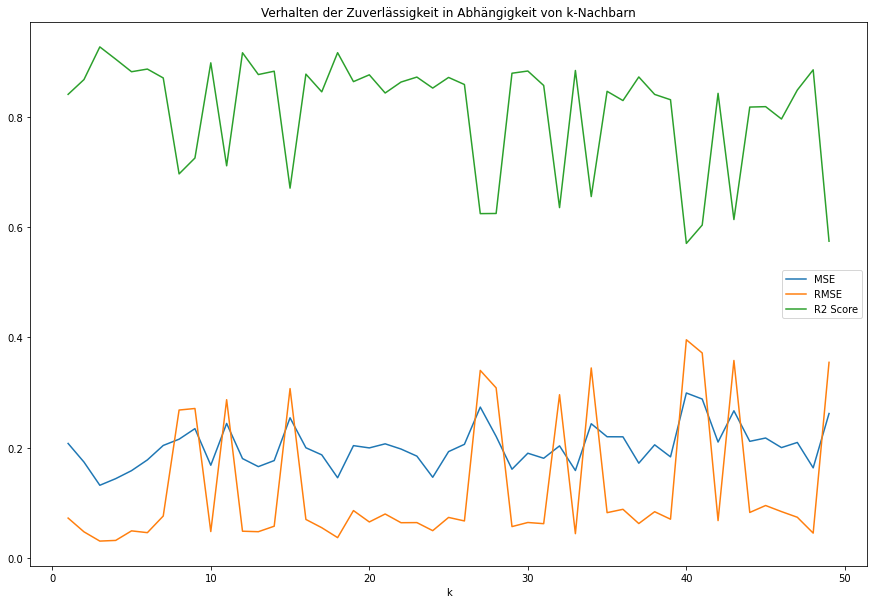

In [11]:
df_eval.loc[df_eval['Name'] == "Z Score"].plot(x="k", figsize=(15,10), title="Verhalten der Zuverlässigkeit in Abhängigkeit von k-Nachbarn")

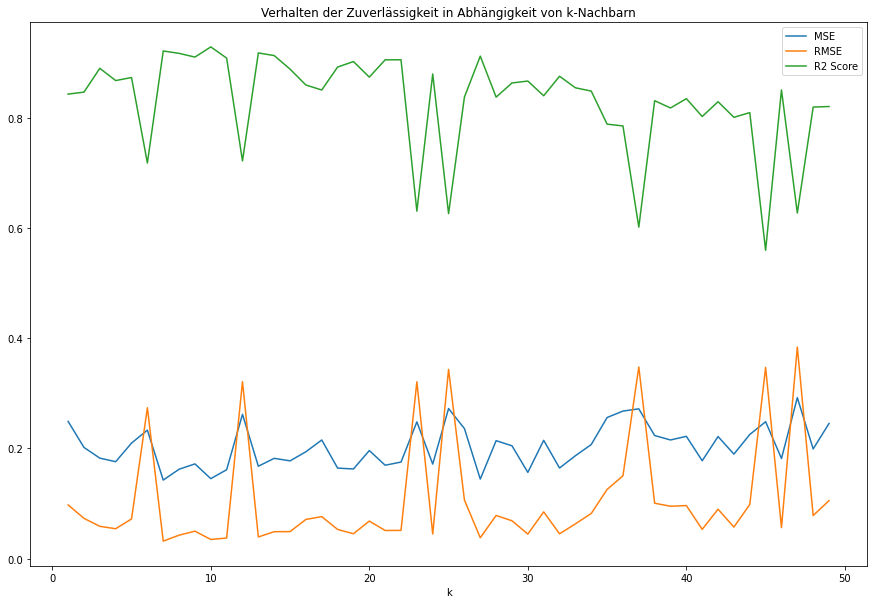

In [12]:
df_eval.loc[df_eval['Name'] == "Min Max"].plot(x="k", figsize=(15,10), title="Verhalten der Zuverlässigkeit in Abhängigkeit von k-Nachbarn")

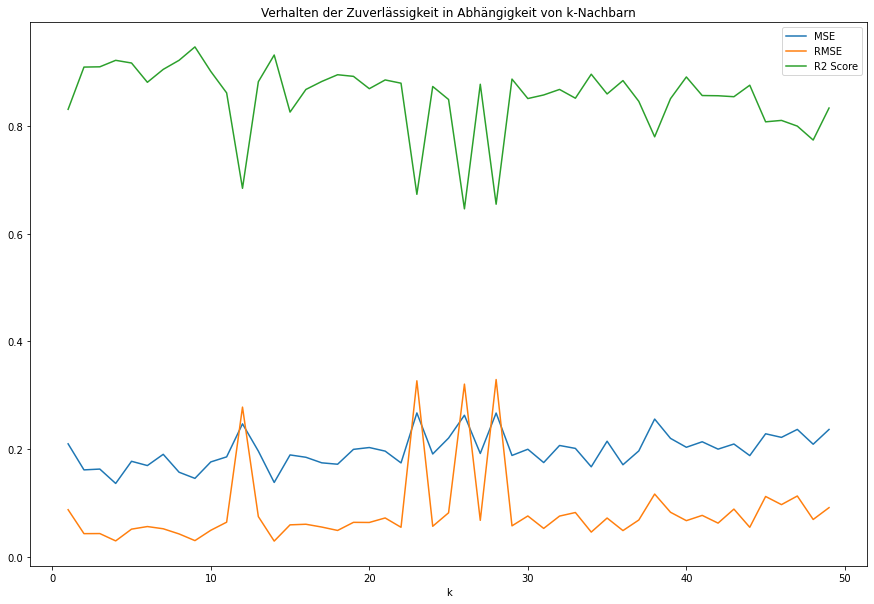

In [13]:
df_eval.loc[df_eval['Name'] == "Robust Scaler"].plot(x="k", figsize=(15,10), title="Verhalten der Zuverlässigkeit in Abhängigkeit von k-Nachbarn")

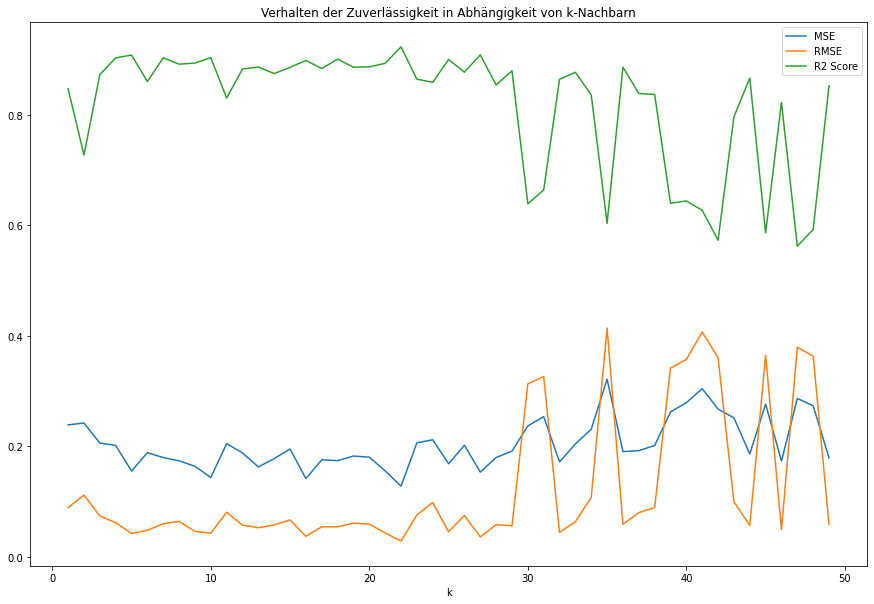

In [14]:
df_eval.loc[df_eval['Name'] == "Quantile Transformer"].plot(x="k", figsize=(15,10), title="Verhalten der Zuverlässigkeit in Abhängigkeit von k-Nachbarn")

In [55]:
### Hyperparameter Optimisation

### Gridsearch
# iteriert über alle Übergabeparameter und prüft die besten Einstellungen
# rf_params gibt an, welche Parameter über welche Eingabedaten geprüft werden sollen
# estimator ist das Model auf das geprüft werden soll
# cv gibt an wie die Daten für die crossvalidierung geteilt werden
# scoring gibt an welchem Parameter sich das Testen orientieren soll
# https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter


from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

(x_train, y_train), (x_test, y_test) = create_set(df_qt, 0.2)

knn       = KNeighborsRegressor()
rf_params = {"n_neighbors": list(range(1, 51))}

gs_random = GridSearchCV(estimator=knn, param_grid=rf_params, cv=5, scoring="r2")
gs_random.fit(x_train, y_train)


k = gs_random.best_params_["n_neighbors"]
print(f"Vorgeschlagener k-Wert: {k}", end="\n\n")
print(df_eval.query(f"Name == 'Quantile Transformer' & k == {k}"), end="\n\n")
print(df_eval.loc[df_eval["Name"] == "Quantile Transformer"].max())


# Weitere Optimierungsmechanismen:
# Sequential Model Based Optimisation

Vorgeschlagener k-Wert: 8

                    Name  k       MSE      RMSE  R2 Score
31  Quantile Transformer  8  0.173423  0.063849  0.891416

Name        Quantile Transformer
k                             49
MSE                      0.32112
RMSE                    0.413726
R2 Score                0.922652
dtype: object
